In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("respondents_loan_access.csv")
data

,COMID,zone_id,state_id,sector,COMM_RESP__id,gender,age,years_lived_in_community,level_of_education,phone_access,loan_source,collateral,women_access
0,COM0001918,South West,OSUN,Urban,2,MALE,56,5.0,SENIOR SECONDARY,Yes,cooperatives,NO,YES
1,COM0001918,South West,OSUN,Urban,7,FEMALE,45,7.0,PRIMARY,Yes,cooperatives,NO,YES
2,COM0001918,South West,OSUN,Urban,6,MALE,50,8.0,SENIOR SECONDARY,Yes,cooperatives,NO,YES
3,COM0001918,South West,OSUN,Urban,3,FEMALE,35,8.0,SENIOR SECONDARY,Yes,cooperatives,NO,YES
4,COM0001918,South West,OSUN,Urban,4,MALE,60,18.0,JUNIOR SECONDARY,Yes,cooperatives,NO,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250528,COM0021662,South West,LAGOS,Urban,6,MALE,50,30.0,NONE,Yes,"informal savings groups (esusu, adashi, etc)",NO,YES
250529,COM0021662,South West,LAGOS,Urban,3,MALE,35,18.0,NONE,Yes,"informal savings groups (esusu, adashi, etc)",NO,YES
250530,COM0021662,South West,LAGOS,Urban,4,MALE,60,28.0,NONE,Yes,"informal savings groups (esusu, adashi, etc)",NO,YES
250531,COM0021662,South West,LAGOS,Urban,5,MALE,60,35.0,NONE,Yes,"informal savings groups (esusu, adashi, etc)",NO,YES


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250533 entries, 0 to 250532
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   COMID                     250533 non-null  object 
 1   zone_id                   250533 non-null  object 
 2   state_id                  250533 non-null  object 
 3   sector                    250533 non-null  object 
 4   COMM_RESP__id             250533 non-null  int64  
 5   gender                    250533 non-null  object 
 6   age                       250533 non-null  int64  
 7   years_lived_in_community  250533 non-null  float64
 8   level_of_education        250533 non-null  object 
 9   phone_access              250533 non-null  object 
 10  loan_source               250533 non-null  object 
 11  collateral                250533 non-null  object 
 12  women_access              250533 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory u

In [4]:
data.columns

Index(['COMID', 'zone_id', 'state_id', 'sector', 'COMM_RESP__id', 'gender',
       'age', 'years_lived_in_community', 'level_of_education', 'phone_access',
       'loan_source', 'collateral', 'women_access'],
      dtype='object')

In [5]:
data.describe()

,COMM_RESP__id,age,years_lived_in_community
count,250533.000000,250533.000000,250533.000000
mean,4.404725,49.514044,35.357913
std,2.490332,13.630551,18.075336
min,1.000000,18.000000,5.000000
25%,2.000000,40.000000,20.000000
50%,4.000000,49.000000,35.000000
75%,6.000000,60.000000,49.000000
max,21.000000,80.000000,80.000000


In [6]:
data.isnull().sum()

COMID                       0
zone_id                     0
state_id                    0
sector                      0
COMM_RESP__id               0
gender                      0
age                         0
years_lived_in_community    0
level_of_education          0
phone_access                0
loan_source                 0
collateral                  0
women_access                0
dtype: int64

<AxesSubplot:>

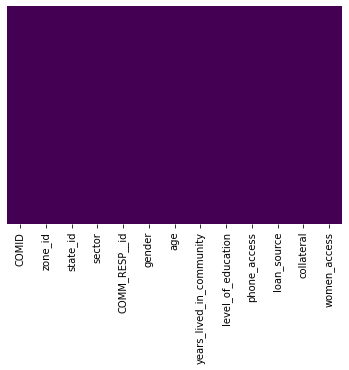

In [7]:
sns.heatmap(data.isnull(), cbar = False, cmap = 'viridis', yticklabels = False)

In [8]:
data.corr()

,COMM_RESP__id,age,years_lived_in_community
COMM_RESP__id,1.000000,-0.162577,-0.094650
age,-0.162577,1.000000,0.510264
years_lived_in_community,-0.094650,0.510264,1.000000


In [9]:
data['loan_source'].value_counts()

informal savings groups (esusu, adashi, etc)    99035
moneylenders                                    57598
cooperatives                                    45797
other                                           27280
formal banks                                    20823
Name: loan_source, dtype: int64

In [10]:
data['loan_source'].unique()

array(['cooperatives', 'informal savings groups (esusu, adashi, etc)',
       'moneylenders', 'formal banks', 'other'], dtype=object)

In [11]:
map = {'cooperatives':0, 'informal savings groups (esusu, adashi, etc)':1,
       'moneylenders':2, 'formal banks':3, 'other':4}

In [12]:
data['loan_source'] = data['loan_source'].replace(map)
data

,COMID,zone_id,state_id,sector,COMM_RESP__id,gender,age,years_lived_in_community,level_of_education,phone_access,loan_source,collateral,women_access
0,COM0001918,South West,OSUN,Urban,2,MALE,56,5.0,SENIOR SECONDARY,Yes,0,NO,YES
1,COM0001918,South West,OSUN,Urban,7,FEMALE,45,7.0,PRIMARY,Yes,0,NO,YES
2,COM0001918,South West,OSUN,Urban,6,MALE,50,8.0,SENIOR SECONDARY,Yes,0,NO,YES
3,COM0001918,South West,OSUN,Urban,3,FEMALE,35,8.0,SENIOR SECONDARY,Yes,0,NO,YES
4,COM0001918,South West,OSUN,Urban,4,MALE,60,18.0,JUNIOR SECONDARY,Yes,0,NO,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250528,COM0021662,South West,LAGOS,Urban,6,MALE,50,30.0,NONE,Yes,1,NO,YES
250529,COM0021662,South West,LAGOS,Urban,3,MALE,35,18.0,NONE,Yes,1,NO,YES
250530,COM0021662,South West,LAGOS,Urban,4,MALE,60,28.0,NONE,Yes,1,NO,YES
250531,COM0021662,South West,LAGOS,Urban,5,MALE,60,35.0,NONE,Yes,1,NO,YES


In [13]:
data.columns

Index(['COMID', 'zone_id', 'state_id', 'sector', 'COMM_RESP__id', 'gender',
       'age', 'years_lived_in_community', 'level_of_education', 'phone_access',
       'loan_source', 'collateral', 'women_access'],
      dtype='object')

In [14]:
data['collateral'].value_counts()

NO     133432
YES    117101
Name: collateral, dtype: int64

In [15]:
data['collateral'].unique()

array(['NO', 'YES'], dtype=object)

In [16]:
map = {'NO':0, 'YES':1}

In [17]:
data['collateral'] = data['collateral'].replace(map)
data

,COMID,zone_id,state_id,sector,COMM_RESP__id,gender,age,years_lived_in_community,level_of_education,phone_access,loan_source,collateral,women_access
0,COM0001918,South West,OSUN,Urban,2,MALE,56,5.0,SENIOR SECONDARY,Yes,0,0,YES
1,COM0001918,South West,OSUN,Urban,7,FEMALE,45,7.0,PRIMARY,Yes,0,0,YES
2,COM0001918,South West,OSUN,Urban,6,MALE,50,8.0,SENIOR SECONDARY,Yes,0,0,YES
3,COM0001918,South West,OSUN,Urban,3,FEMALE,35,8.0,SENIOR SECONDARY,Yes,0,0,YES
4,COM0001918,South West,OSUN,Urban,4,MALE,60,18.0,JUNIOR SECONDARY,Yes,0,0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250528,COM0021662,South West,LAGOS,Urban,6,MALE,50,30.0,NONE,Yes,1,0,YES
250529,COM0021662,South West,LAGOS,Urban,3,MALE,35,18.0,NONE,Yes,1,0,YES
250530,COM0021662,South West,LAGOS,Urban,4,MALE,60,28.0,NONE,Yes,1,0,YES
250531,COM0021662,South West,LAGOS,Urban,5,MALE,60,35.0,NONE,Yes,1,0,YES


In [18]:
data['women_access'].value_counts()

YES    216299
NO      34234
Name: women_access, dtype: int64

In [19]:
data['women_access'].unique()

array(['YES', 'NO'], dtype=object)

In [20]:
map = {'YES':0, 'NO':1}

In [21]:
data['women_access'] = data['women_access'].replace(map)
data

,COMID,zone_id,state_id,sector,COMM_RESP__id,gender,age,years_lived_in_community,level_of_education,phone_access,loan_source,collateral,women_access
0,COM0001918,South West,OSUN,Urban,2,MALE,56,5.0,SENIOR SECONDARY,Yes,0,0,0
1,COM0001918,South West,OSUN,Urban,7,FEMALE,45,7.0,PRIMARY,Yes,0,0,0
2,COM0001918,South West,OSUN,Urban,6,MALE,50,8.0,SENIOR SECONDARY,Yes,0,0,0
3,COM0001918,South West,OSUN,Urban,3,FEMALE,35,8.0,SENIOR SECONDARY,Yes,0,0,0
4,COM0001918,South West,OSUN,Urban,4,MALE,60,18.0,JUNIOR SECONDARY,Yes,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250528,COM0021662,South West,LAGOS,Urban,6,MALE,50,30.0,NONE,Yes,1,0,0
250529,COM0021662,South West,LAGOS,Urban,3,MALE,35,18.0,NONE,Yes,1,0,0
250530,COM0021662,South West,LAGOS,Urban,4,MALE,60,28.0,NONE,Yes,1,0,0
250531,COM0021662,South West,LAGOS,Urban,5,MALE,60,35.0,NONE,Yes,1,0,0


In [22]:
data['gender'].value_counts()

MALE      198012
FEMALE     52521
Name: gender, dtype: int64

In [23]:
data['gender'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [24]:
map = {'MALE':0, 'FEMALE':1}

In [25]:
data['gender'] = data['gender'].replace(map)
data

,COMID,zone_id,state_id,sector,COMM_RESP__id,gender,age,years_lived_in_community,level_of_education,phone_access,loan_source,collateral,women_access
0,COM0001918,South West,OSUN,Urban,2,0,56,5.0,SENIOR SECONDARY,Yes,0,0,0
1,COM0001918,South West,OSUN,Urban,7,1,45,7.0,PRIMARY,Yes,0,0,0
2,COM0001918,South West,OSUN,Urban,6,0,50,8.0,SENIOR SECONDARY,Yes,0,0,0
3,COM0001918,South West,OSUN,Urban,3,1,35,8.0,SENIOR SECONDARY,Yes,0,0,0
4,COM0001918,South West,OSUN,Urban,4,0,60,18.0,JUNIOR SECONDARY,Yes,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250528,COM0021662,South West,LAGOS,Urban,6,0,50,30.0,NONE,Yes,1,0,0
250529,COM0021662,South West,LAGOS,Urban,3,0,35,18.0,NONE,Yes,1,0,0
250530,COM0021662,South West,LAGOS,Urban,4,0,60,28.0,NONE,Yes,1,0,0
250531,COM0021662,South West,LAGOS,Urban,5,0,60,35.0,NONE,Yes,1,0,0


In [26]:
data['sector'].value_counts()

Rural    137690
Urban    112843
Name: sector, dtype: int64

In [27]:
data['sector'].unique()

array(['Urban', 'Rural'], dtype=object)

In [28]:
map = {'Urban':0, 'Rural':1}

In [29]:
data['sector'] = data['sector'].replace(map)
data

,COMID,zone_id,state_id,sector,COMM_RESP__id,gender,age,years_lived_in_community,level_of_education,phone_access,loan_source,collateral,women_access
0,COM0001918,South West,OSUN,0,2,0,56,5.0,SENIOR SECONDARY,Yes,0,0,0
1,COM0001918,South West,OSUN,0,7,1,45,7.0,PRIMARY,Yes,0,0,0
2,COM0001918,South West,OSUN,0,6,0,50,8.0,SENIOR SECONDARY,Yes,0,0,0
3,COM0001918,South West,OSUN,0,3,1,35,8.0,SENIOR SECONDARY,Yes,0,0,0
4,COM0001918,South West,OSUN,0,4,0,60,18.0,JUNIOR SECONDARY,Yes,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250528,COM0021662,South West,LAGOS,0,6,0,50,30.0,NONE,Yes,1,0,0
250529,COM0021662,South West,LAGOS,0,3,0,35,18.0,NONE,Yes,1,0,0
250530,COM0021662,South West,LAGOS,0,4,0,60,28.0,NONE,Yes,1,0,0
250531,COM0021662,South West,LAGOS,0,5,0,60,35.0,NONE,Yes,1,0,0


In [30]:
data.corr()

,sector,COMM_RESP__id,gender,age,years_lived_in_community,loan_source,collateral,women_access
sector,1.000000,-0.004921,-0.055144,-0.065718,0.163556,0.020938,-0.133126,0.109297
COMM_RESP__id,-0.004921,1.000000,0.077691,-0.162577,-0.094650,-0.010438,0.015992,-0.015569
gender,-0.055144,0.077691,1.000000,-0.074498,-0.150825,-0.014956,0.010344,-0.050324
age,-0.065718,-0.162577,-0.074498,1.000000,0.510264,-0.019789,0.026240,-0.027166
years_lived_in_community,0.163556,-0.094650,-0.150825,0.510264,1.000000,0.012141,-0.027851,0.036969
loan_source,0.020938,-0.010438,-0.014956,-0.019789,0.012141,1.000000,-0.054957,0.251003
collateral,-0.133126,0.015992,0.010344,0.026240,-0.027851,-0.054957,1.000000,-0.210584
women_access,0.109297,-0.015569,-0.050324,-0.027166,0.036969,0.251003,-0.210584,1.000000


<AxesSubplot:>

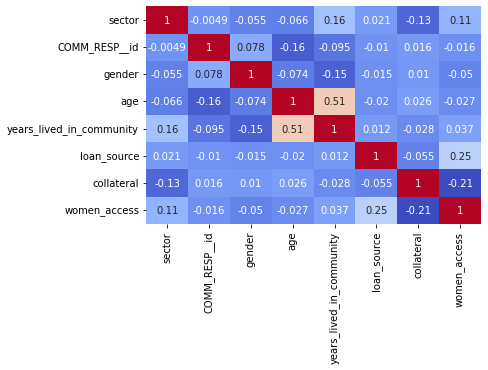

In [31]:
sns.heatmap(data.corr(), annot = True, cbar = False, cmap = 'coolwarm')

In [32]:
data.columns

Index(['COMID', 'zone_id', 'state_id', 'sector', 'COMM_RESP__id', 'gender',
       'age', 'years_lived_in_community', 'level_of_education', 'phone_access',
       'loan_source', 'collateral', 'women_access'],
      dtype='object')

In [33]:
data['phone_access'].value_counts()

Yes    211285
No      39248
Name: phone_access, dtype: int64

In [34]:
data['phone_access'].unique()

array(['Yes', 'No'], dtype=object)

In [35]:
map = {'Yes':0, 'No':1}

In [36]:
data['phone_access'] = data['phone_access'].replace(map)
data

,COMID,zone_id,state_id,sector,COMM_RESP__id,gender,age,years_lived_in_community,level_of_education,phone_access,loan_source,collateral,women_access
0,COM0001918,South West,OSUN,0,2,0,56,5.0,SENIOR SECONDARY,0,0,0,0
1,COM0001918,South West,OSUN,0,7,1,45,7.0,PRIMARY,0,0,0,0
2,COM0001918,South West,OSUN,0,6,0,50,8.0,SENIOR SECONDARY,0,0,0,0
3,COM0001918,South West,OSUN,0,3,1,35,8.0,SENIOR SECONDARY,0,0,0,0
4,COM0001918,South West,OSUN,0,4,0,60,18.0,JUNIOR SECONDARY,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250528,COM0021662,South West,LAGOS,0,6,0,50,30.0,NONE,0,1,0,0
250529,COM0021662,South West,LAGOS,0,3,0,35,18.0,NONE,0,1,0,0
250530,COM0021662,South West,LAGOS,0,4,0,60,28.0,NONE,0,1,0,0
250531,COM0021662,South West,LAGOS,0,5,0,60,35.0,NONE,0,1,0,0


In [37]:
data['level_of_education'].value_counts()

SENIOR SECONDARY                             67793
PRIMARY                                      47915
NONE                                         27771
QUARANIC/INTEGRATED QUARANIC                 25647
1st DEGREE                                   23195
NATIONAL CERTIFICATE OF EDUCATION (NCE)      17502
POLYTECHNIC/PROF                             12532
JUNIOR SECONDARY                              6689
HIGHER DEGREE (POST-GRADUATE)                 5982
TERTIARY VOCATIONAL/TECHNICAL/COMMERCIAL      5393
TEACHER TRAINING                              2902
SECONDARY VOCATIONAL/TECHNICAL/COMMERCIAL     2115
LOWER/UPPER 6                                 1954
MODERN SCHOOL                                 1352
ADULT EDUCATION                                773
OTHER                                          492
OTHER RELIGIOUS                                360
NURSERY                                        166
Name: level_of_education, dtype: int64

In [38]:
data['level_of_education'].unique()

array(['SENIOR SECONDARY', 'PRIMARY', 'JUNIOR SECONDARY', 'NONE',
       'MODERN SCHOOL', '1st DEGREE', 'QUARANIC/INTEGRATED QUARANIC',
       'NATIONAL CERTIFICATE OF EDUCATION (NCE)',
       'HIGHER DEGREE (POST-GRADUATE)', 'POLYTECHNIC/PROF',
       'TERTIARY VOCATIONAL/TECHNICAL/COMMERCIAL', 'TEACHER TRAINING',
       'OTHER', 'OTHER RELIGIOUS', 'LOWER/UPPER 6', 'ADULT EDUCATION',
       'SECONDARY VOCATIONAL/TECHNICAL/COMMERCIAL', 'NURSERY'],
      dtype=object)

In [39]:
map = {'SENIOR SECONDARY':0, 'PRIMARY':1, 'JUNIOR SECONDARY':2, 'NONE':3,
       'MODERN SCHOOL':4, '1st DEGREE':5, 'QUARANIC/INTEGRATED QUARANIC':6,
       'NATIONAL CERTIFICATE OF EDUCATION (NCE)':7,
       'HIGHER DEGREE (POST-GRADUATE)':8, 'POLYTECHNIC/PROF':9,
       'TERTIARY VOCATIONAL/TECHNICAL/COMMERCIAL':10, 'TEACHER TRAINING':11,
       'OTHER':12, 'OTHER RELIGIOUS':13, 'LOWER/UPPER 6':14, 'ADULT EDUCATION':15,
       'SECONDARY VOCATIONAL/TECHNICAL/COMMERCIAL':16, 'NURSERY':17}

In [40]:
data['level_of_education'] = data['level_of_education'].replace(map)
data

,COMID,zone_id,state_id,sector,COMM_RESP__id,gender,age,years_lived_in_community,level_of_education,phone_access,loan_source,collateral,women_access
0,COM0001918,South West,OSUN,0,2,0,56,5.0,0,0,0,0,0
1,COM0001918,South West,OSUN,0,7,1,45,7.0,1,0,0,0,0
2,COM0001918,South West,OSUN,0,6,0,50,8.0,0,0,0,0,0
3,COM0001918,South West,OSUN,0,3,1,35,8.0,0,0,0,0,0
4,COM0001918,South West,OSUN,0,4,0,60,18.0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250528,COM0021662,South West,LAGOS,0,6,0,50,30.0,3,0,1,0,0
250529,COM0021662,South West,LAGOS,0,3,0,35,18.0,3,0,1,0,0
250530,COM0021662,South West,LAGOS,0,4,0,60,28.0,3,0,1,0,0
250531,COM0021662,South West,LAGOS,0,5,0,60,35.0,3,0,1,0,0


In [41]:
data['state_id'].value_counts()

OYO            12758
KANO           12063
OSUN           10139
KATSINA        10116
AKWA IBOM       9557
JIGAWA          9302
BENUE           8905
KADUNA          8043
ADAMAWA         8037
ANAMBRA         7846
OGUN            7835
CROSS RIVER     7789
IMO             7274
NIGER           7253
SOKOTO          6924
KEBBI           6884
LAGOS           6410
ENUGU           6373
RIVERS          6349
KOGI            6334
ABIA            6234
TARABA          6034
DELTA           5950
ONDO            5875
BAUCHI          5616
EDO             5605
EBONYI          5438
BORNO           5272
EKITI           5140
YOBE            5077
NASARAWA        5021
PLATEAU         4983
GOMBE           4863
KWARA           4731
ZAMFARA         4525
FCT             2153
BAYELSA         1825
Name: state_id, dtype: int64

In [42]:
data['zone_id'].value_counts()

North West       57857
South West       48157
North Central    39380
South South      37075
North East       34899
South East       33165
Name: zone_id, dtype: int64

In [43]:
data['zone_id'].unique()

array(['South West', 'South South', 'North West', 'North East',
       'South East', 'North Central'], dtype=object)

In [44]:
map = {'South West':0, 'South South':1, 'North West':2, 'North East':3,
       'South East':4, 'North Central':5}

In [45]:
data['zone_id'] = data['zone_id'].replace(map)
data

,COMID,zone_id,state_id,sector,COMM_RESP__id,gender,age,years_lived_in_community,level_of_education,phone_access,loan_source,collateral,women_access
0,COM0001918,0,OSUN,0,2,0,56,5.0,0,0,0,0,0
1,COM0001918,0,OSUN,0,7,1,45,7.0,1,0,0,0,0
2,COM0001918,0,OSUN,0,6,0,50,8.0,0,0,0,0,0
3,COM0001918,0,OSUN,0,3,1,35,8.0,0,0,0,0,0
4,COM0001918,0,OSUN,0,4,0,60,18.0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250528,COM0021662,0,LAGOS,0,6,0,50,30.0,3,0,1,0,0
250529,COM0021662,0,LAGOS,0,3,0,35,18.0,3,0,1,0,0
250530,COM0021662,0,LAGOS,0,4,0,60,28.0,3,0,1,0,0
250531,COM0021662,0,LAGOS,0,5,0,60,35.0,3,0,1,0,0


In [46]:
data.corr()

,zone_id,sector,COMM_RESP__id,gender,age,years_lived_in_community,level_of_education,phone_access,loan_source,collateral,women_access
zone_id,1.000000,0.102086,-0.009639,-0.005294,-0.090125,0.040152,0.007207,0.037582,-0.000974,-0.052240,0.020666
sector,0.102086,1.000000,-0.004921,-0.055144,-0.065718,0.163556,-0.033647,0.165532,0.020938,-0.133126,0.109297
COMM_RESP__id,-0.009639,-0.004921,1.000000,0.077691,-0.162577,-0.094650,-0.025947,0.013517,-0.010438,0.015992,-0.015569
gender,-0.005294,-0.055144,0.077691,1.000000,-0.074498,-0.150825,-0.088612,0.067072,-0.014956,0.010344,-0.050324
age,-0.090125,-0.065718,-0.162577,-0.074498,1.000000,0.510264,0.049570,0.015467,-0.019789,0.026240,-0.027166
years_lived_in_community,0.040152,0.163556,-0.094650,-0.150825,0.510264,1.000000,0.022659,0.078179,0.012141,-0.027851,0.036969
level_of_education,0.007207,-0.033647,-0.025947,-0.088612,0.049570,0.022659,1.000000,-0.010426,0.011546,0.010844,0.006033
phone_access,0.037582,0.165532,0.013517,0.067072,0.015467,0.078179,-0.010426,1.000000,0.033304,-0.066553,0.092301
loan_source,-0.000974,0.020938,-0.010438,-0.014956,-0.019789,0.012141,0.011546,0.033304,1.000000,-0.054957,0.251003
collateral,-0.052240,-0.133126,0.015992,0.010344,0.026240,-0.027851,0.010844,-0.066553,-0.054957,1.000000,-0.210584


<AxesSubplot:>

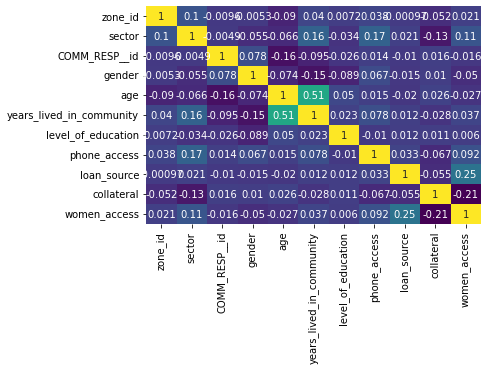

In [47]:
sns.heatmap(data.corr(), annot = True, cbar = False, cmap = 'viridis')

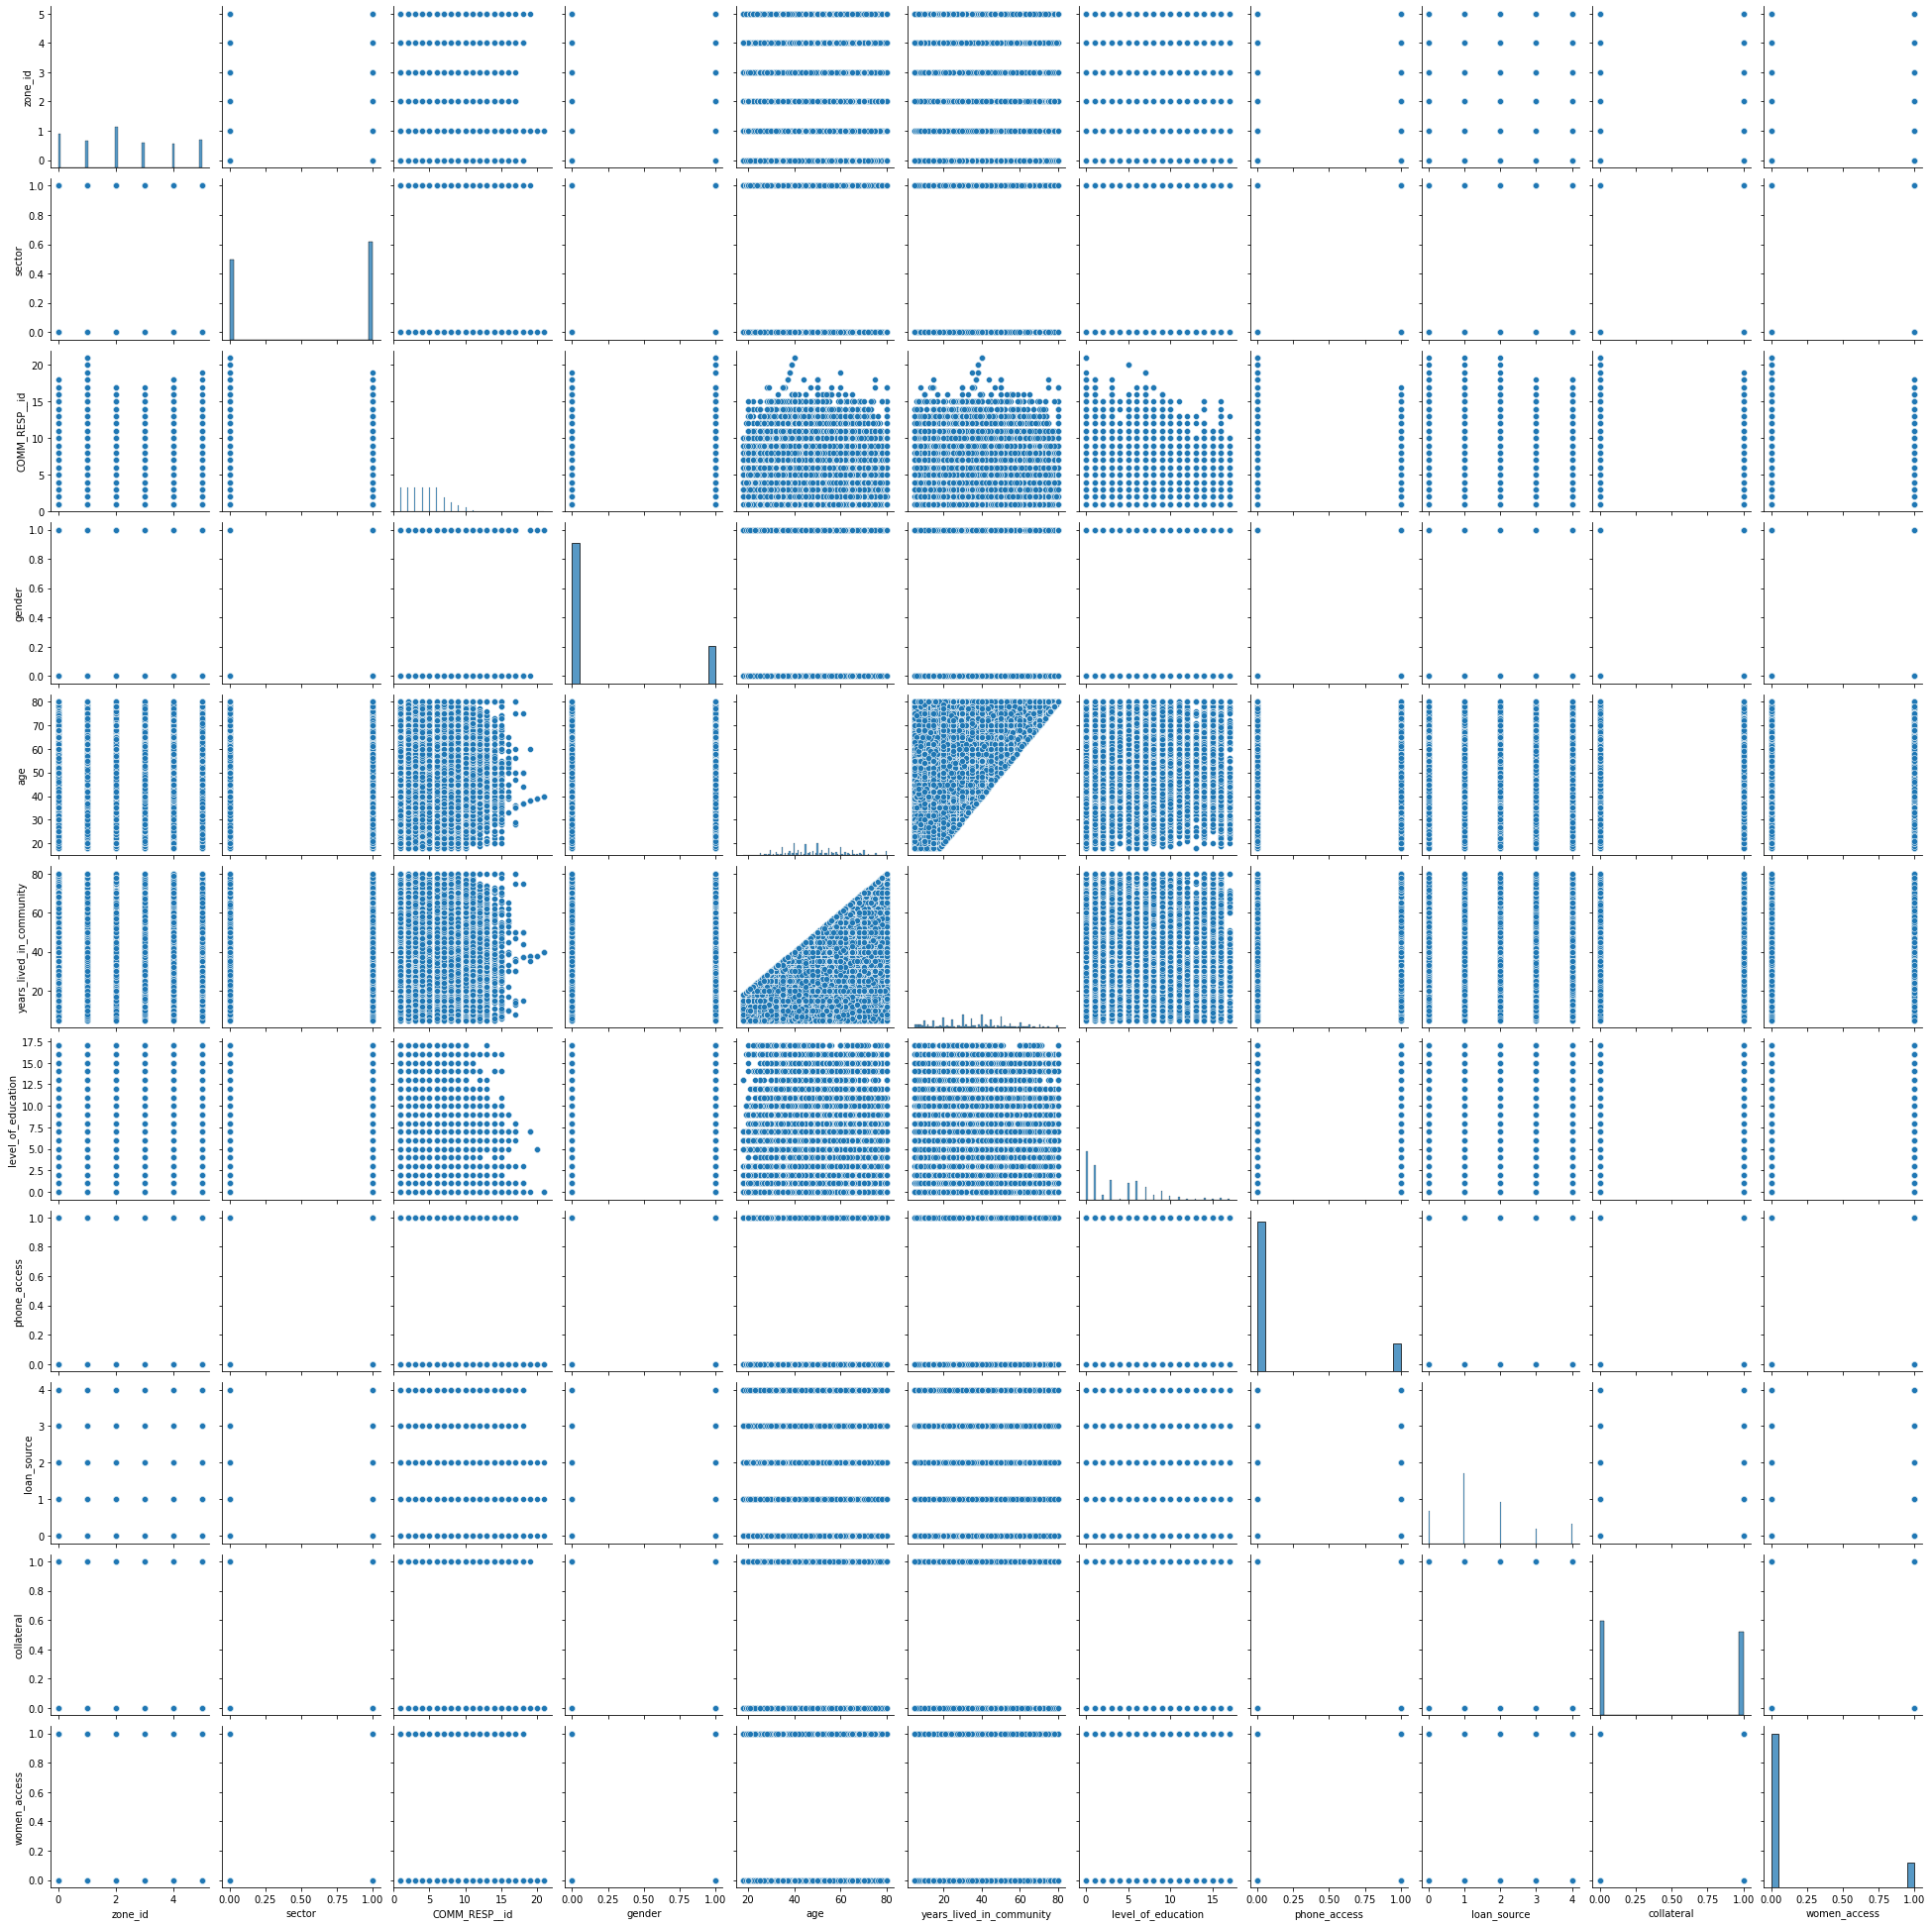

In [48]:
sns.pairplot(data)

In [49]:
data.columns

Index(['COMID', 'zone_id', 'state_id', 'sector', 'COMM_RESP__id', 'gender',
       'age', 'years_lived_in_community', 'level_of_education', 'phone_access',
       'loan_source', 'collateral', 'women_access'],
      dtype='object')

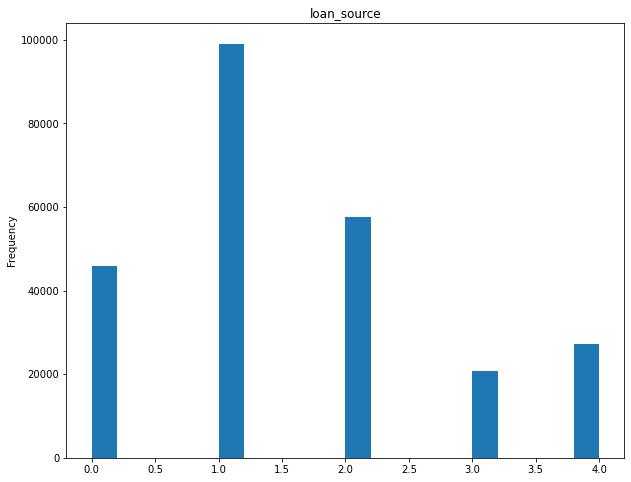

In [50]:
plt.figure(figsize= (10, 8))
data['loan_source'].plot.hist(bins = 20)
plt.title('loan_source')
plt.show()

Text(0.5, 1.0, 'loan_source vs. women_access')

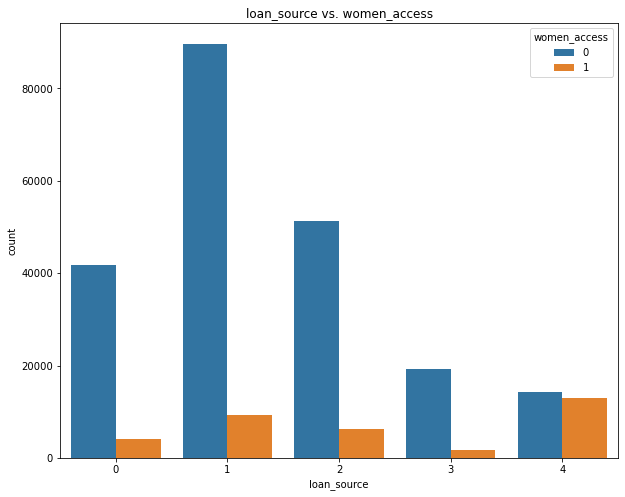

In [51]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'loan_source', hue = 'women_access', data = data)
plt.title('loan_source vs. women_access')

<AxesSubplot:xlabel='count', ylabel='age'>

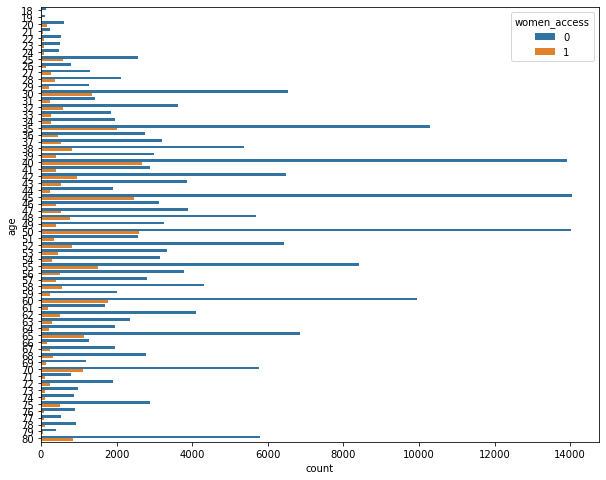

In [52]:
plt.figure(figsize = (10,8))
sns.countplot(y = 'age',  hue = 'women_access', data = data)

<AxesSubplot:xlabel='count', ylabel='zone_id'>

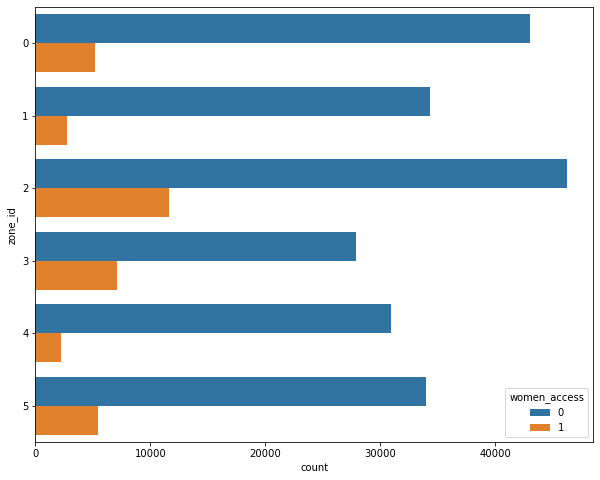

In [53]:
plt.figure(figsize = (10,8))
sns.countplot(y = 'zone_id',  hue = 'women_access', data = data)

Text(0.5, 1.0, 'loan_source vs. women_access')

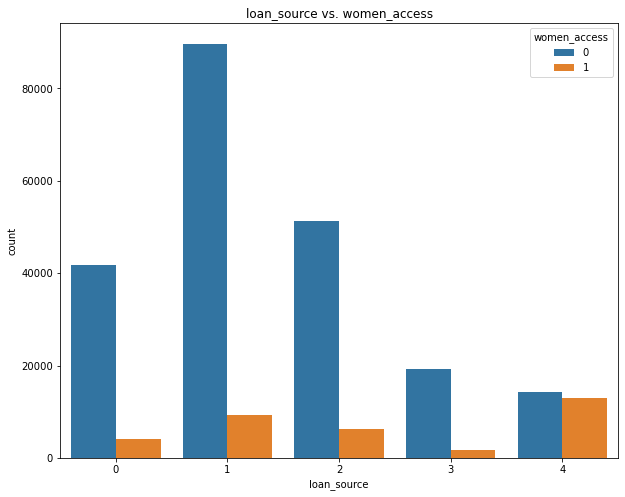

In [54]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'loan_source',  hue = 'women_access', data = data)
plt.title('loan_source vs. women_access')

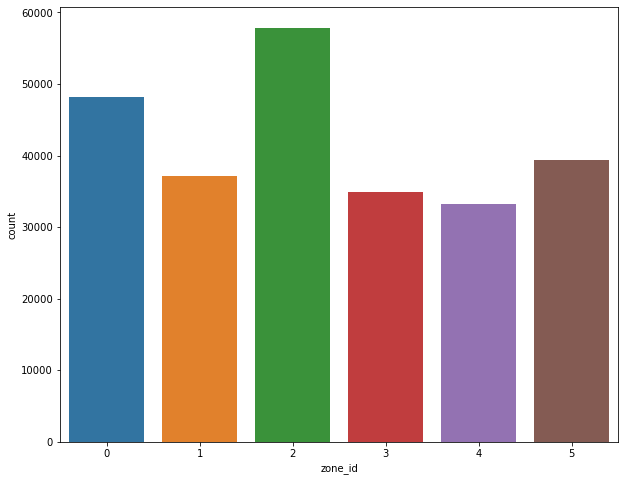

Text(0.5, 1.0, 'zone_id')

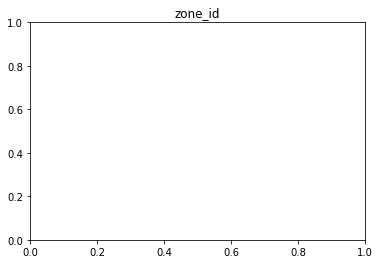

In [55]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'zone_id', data = data)
plt.show()
plt.title('zone_id')

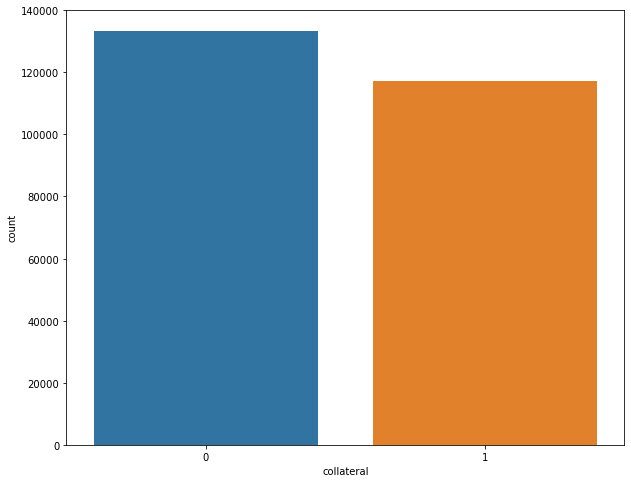

In [56]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'collateral', data = data)
plt.show()

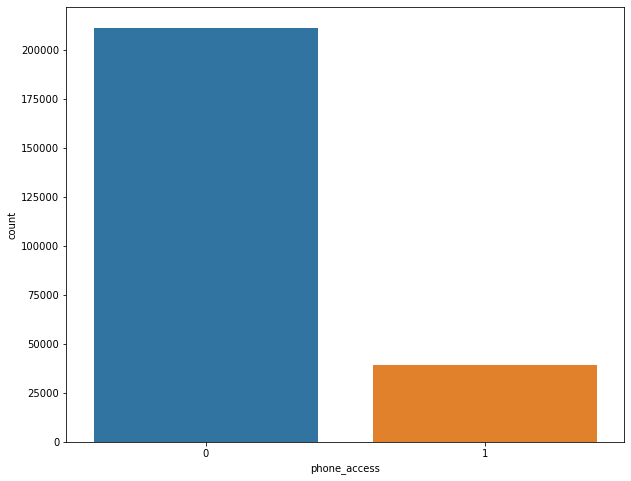

Text(0.5, 1.0, 'phone_access')

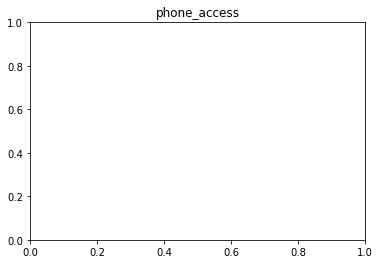

In [57]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'phone_access', data = data)
plt.show()
plt.title('phone_access')

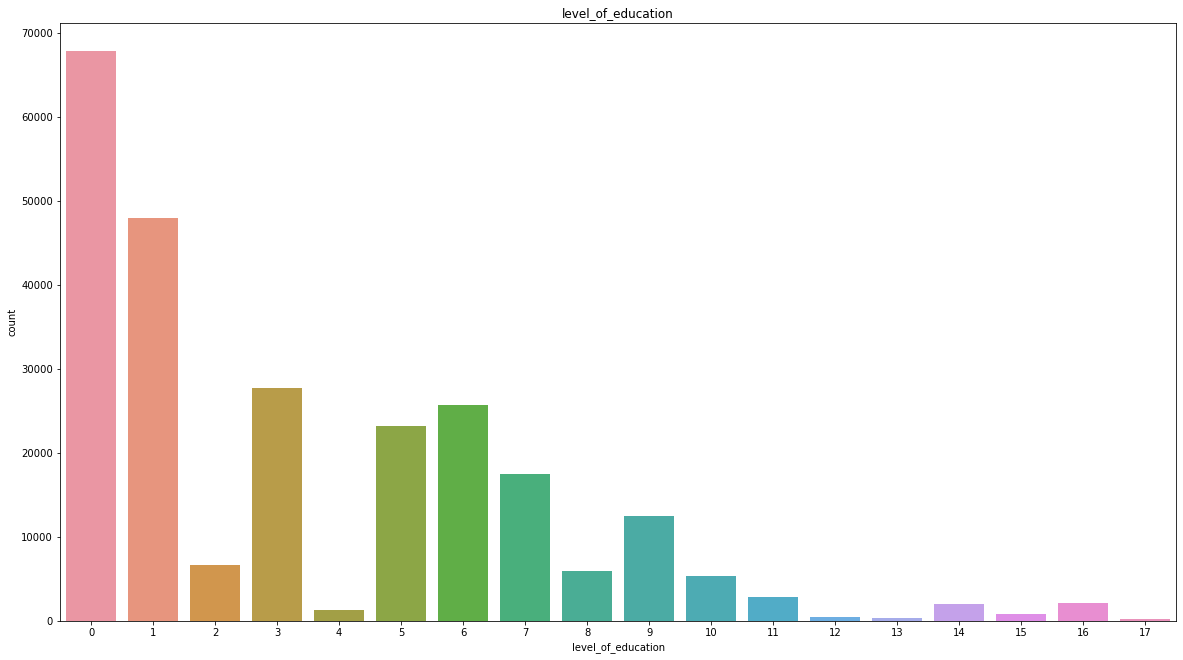

In [58]:
plt.figure(figsize = (20,11))
sns.countplot(x = 'level_of_education', data = data)
plt.title('level_of_education')
plt.show()

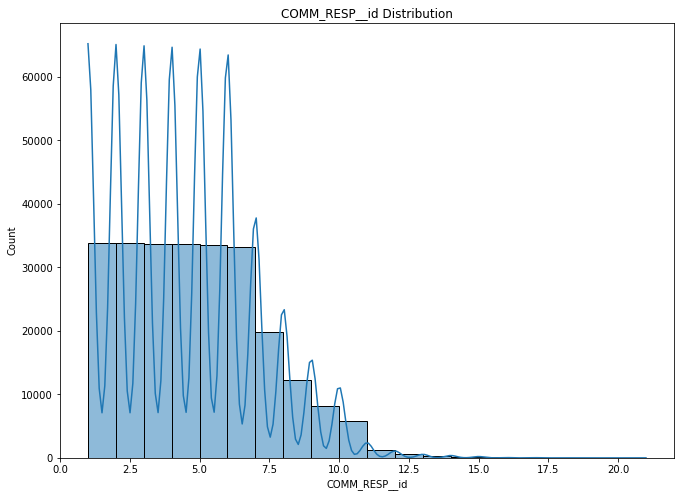

In [59]:
plt.figure(figsize = (11,8))
sns.histplot(data['COMM_RESP__id'], bins = 20, kde = True)
plt.title('COMM_RESP__id Distribution')
plt.show()

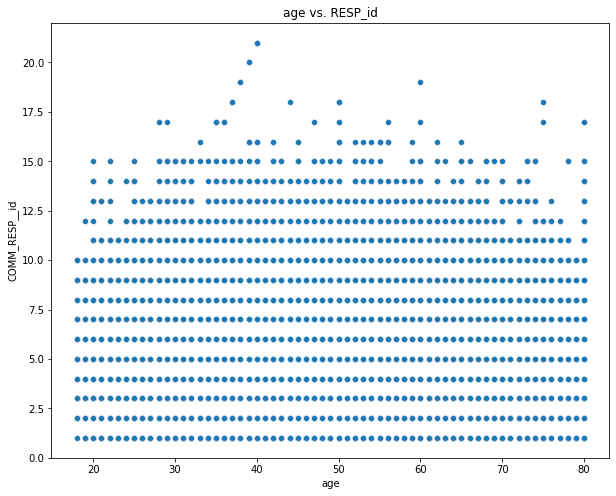

In [60]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'age', y = 'COMM_RESP__id', data = data)
plt.title('age vs. RESP_id')
plt.show()

<Figure size 720x576 with 0 Axes>

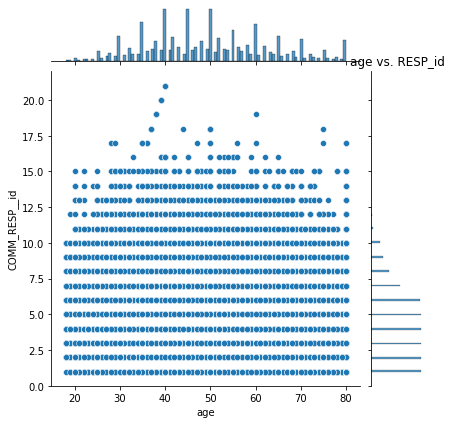

In [61]:
plt.figure(figsize = (10,8))
sns.jointplot(x = 'age', y = 'COMM_RESP__id', data = data)
plt.title('age vs. RESP_id')
plt.show()

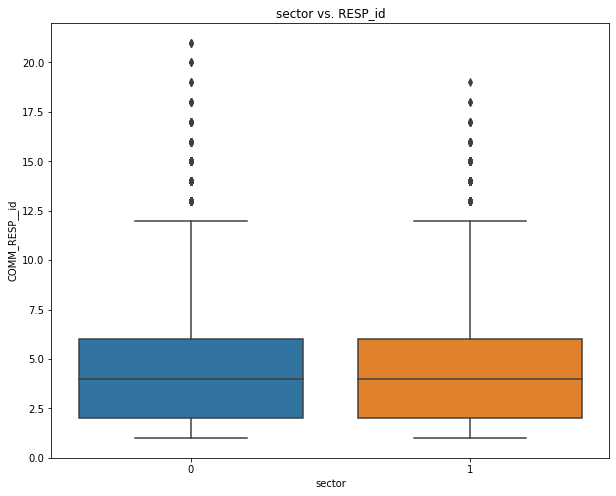

In [62]:
plt.figure(figsize = (10,8))
sns.boxplot(x = 'sector', y = 'COMM_RESP__id', data = data)
plt.title('sector vs. RESP_id')
plt.show()

In [63]:
data.columns

Index(['COMID', 'zone_id', 'state_id', 'sector', 'COMM_RESP__id', 'gender',
       'age', 'years_lived_in_community', 'level_of_education', 'phone_access',
       'loan_source', 'collateral', 'women_access'],
      dtype='object')

In [67]:
data['creditworthiness'] = data['loan_source'].apply(lambda x: 0 if x == 3 else 1)
features = ['age', 'years_lived_in_community', 'level_of_education', 'phone_access', 'sector', 'women_access']
X = pd.get_dummies(data[features])
y = data['creditworthiness']

In [68]:
data['creditworthiness'].value_counts()

1    229710
0     20823
Name: loan_approval, dtype: int64

In [69]:
data['loan_source'].value_counts()

1    99035
2    57598
0    45797
4    27280
3    20823
Name: loan_source, dtype: int64

In [70]:
data['collateral'].value_counts()

0    133432
1    117101
Name: collateral, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [73]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
y_pred_rf = model.predict(X_test)
y_pred_rf

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [75]:
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Classification Report:')
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9085556908216417
Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.01      0.02      4087
           1       0.92      0.99      0.95     46020

    accuracy                           0.91     50107
   macro avg       0.50      0.50      0.49     50107
weighted avg       0.85      0.91      0.88     50107



In [76]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[   54,  4033],
       [  549, 45471]], dtype=int64)

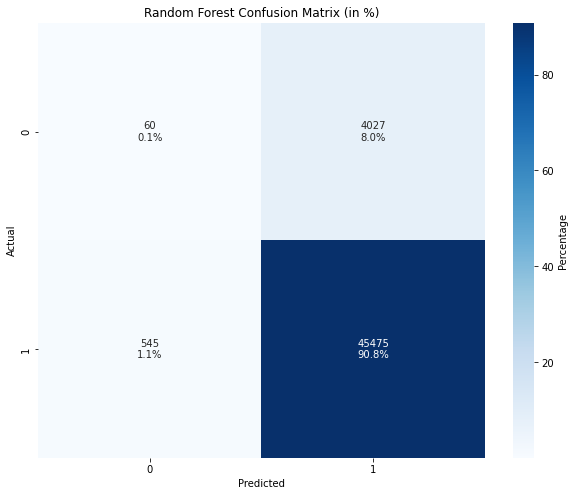

In [77]:
cm = np.array([[60,    4027],
       [ 545,    45475]])

cm_percent = cm / cm.sum() * 100

labels = np.array([["{0}\n{1:.1f}%".format(value, percent)
                   for value, percent in zip(row, row_percent)]
                  for row, row_percent in zip(cm, cm_percent)])

# Create the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm_percent, annot=labels, fmt='', cmap='Blues', cbar_kws={'label': 'Percentage'})

# formatting
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix (in %)')
plt.show()

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [80]:
accuracy = lr.score(X_train, y_train)
accuracy

0.916497859559139

In [81]:
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [82]:
accuracy_test = lr.score(X_test, y_test)
accuracy_test

0.9184345500628655

In [83]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_lr)
cm

array([[    0,  4087],
       [    0, 46020]], dtype=int64)

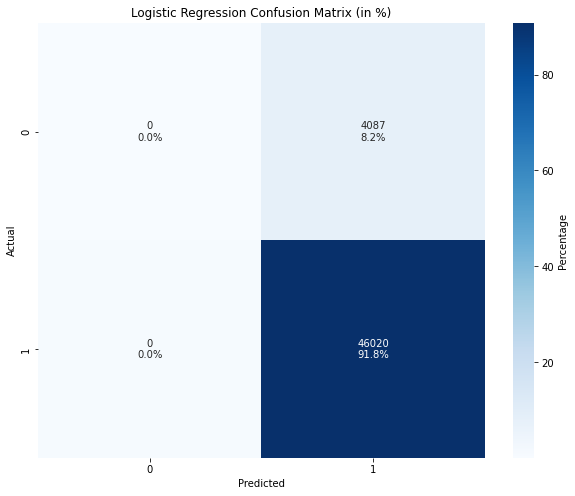

In [84]:
cm2 = np.array([[0,    4087],
       [ 0,    46020]])

cm2_percent = cm2 / cm2.sum() * 100

labels = np.array([["{0}\n{1:.1f}%".format(value, percent)
                   for value, percent in zip(row, row_percent)]
                  for row, row_percent in zip(cm2, cm2_percent)])

# Create the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm_percent, annot=labels, fmt='', cmap='Blues', cbar_kws={'label': 'Percentage'})

# formatting
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix (in %)')
plt.show()

In [85]:
cr2 = classification_report(y_test, y_pred_lr)
print(cr2)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4087
           1       0.92      1.00      0.96     46020

    accuracy                           0.92     50107
   macro avg       0.46      0.50      0.48     50107
weighted avg       0.84      0.92      0.88     50107



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [88]:
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [89]:
cm3 = confusion_matrix(y_test, y_pred_dt)
cm3

array([[  142,  3945],
       [ 1368, 44652]], dtype=int64)

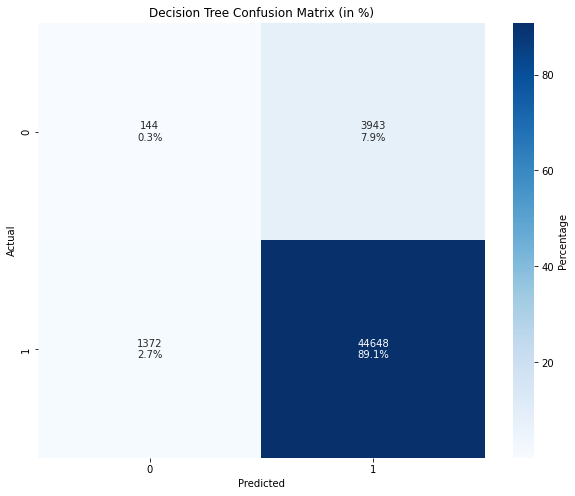

In [90]:
cm3 = np.array([[144,  3943],
       [ 1372,   44648]])

cm3_percent = cm3 / cm3.sum() * 100

labels = np.array([["{0}\n{1:.1f}%".format(value, percent)
                   for value, percent in zip(row, row_percent)]
                  for row, row_percent in zip(cm3, cm3_percent)])

# Create the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm_percent, annot=labels, fmt='', cmap='Blues', cbar_kws={'label': 'Percentage'})

# formatting
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix (in %)')
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


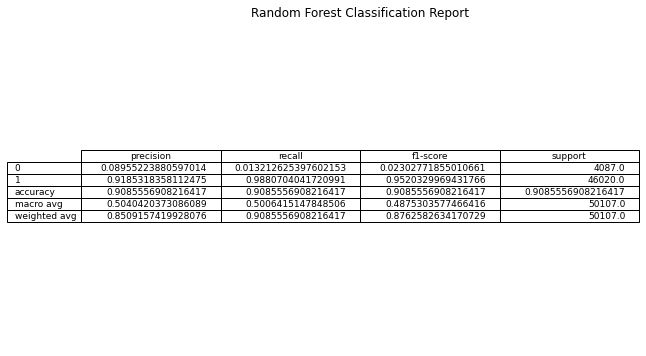

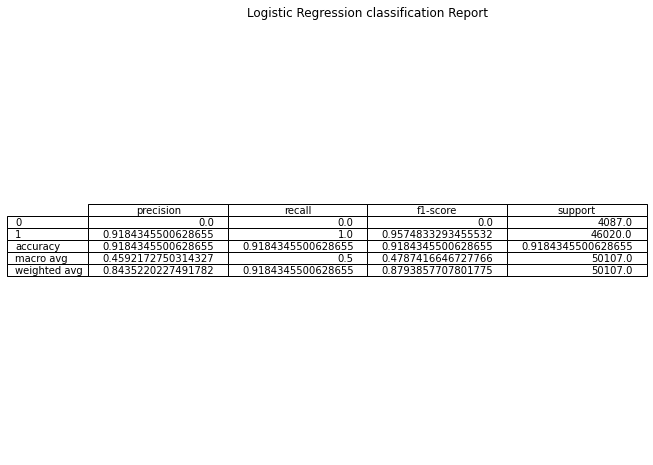

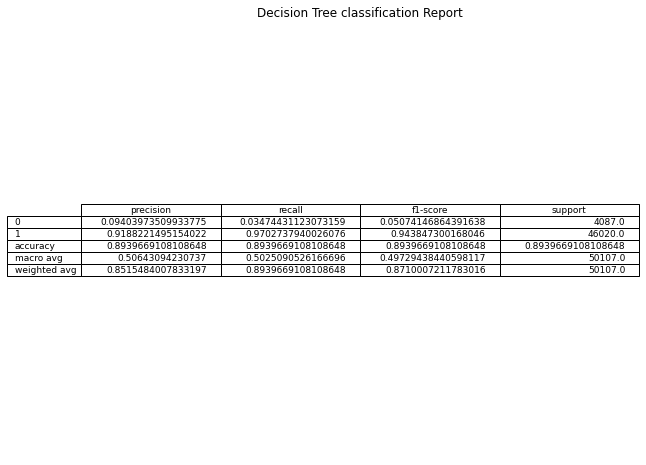

In [99]:
# y_pred_rf = rf_model.predict(X_test)
# y_pred_lr = lr_model.predict(X_test)
# y_pred_dt = dt_model.predict(X_test)


# Random Forest
rf_report = classification_report(y_test, y_pred_rf, output_dict = True)
rf_df = pd.DataFrame(rf_report).transpose()

plt.figure(figsize=(10,6))
plt.table(cellText=rf_df.values, colLabels=rf_df.columns, rowLabels=rf_df.index, loc="center")
plt.axis("off")
plt.title("Random Forest Classification Report")
plt.savefig('rf_classification_report.png', bbox_inches='tight')

# Logistic Regression
lr_report = classification_report(y_test, y_pred_lr, output_dict = True)
lr_df = pd.DataFrame(lr_report).transpose()

plt.figure(figsize=(10,8))
plt.table(cellText=lr_df.values, colLabels=lr_df.columns, rowLabels=lr_df.index, loc="center")
plt.axis("off")
plt.title("Logistic Regression classification Report")
plt.savefig('rf_logistic Regression classification_report.png', bbox_inches='tight')


# Decision Tree
dt_report = classification_report(y_test, y_pred_dt, output_dict = True)
dt_df = pd.DataFrame(dt_report).transpose()

plt.figure(figsize=(10,8))
plt.table(cellText=dt_df.values, colLabels=dt_df.columns, rowLabels=dt_df.index, loc="center")
plt.axis("off")
plt.title("Decision Tree classification Report")
plt.savefig('dt_classification_report.png', bbox_inches='tight')

In [92]:
model_accuracies = {'Logistic Regression': accuracy_score(y_test, y_pred_lr), 
                    'Random Forest Classifier': accuracy_score(y_test, y_pred_rf), 
                    'Decision Tree Classifier': accuracy_score(y_test, y_pred_dt)}

print("Model Accuracies:") 
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.3f}")

Model Accuracies:
Logistic Regression: 0.918
Random Forest Classifier: 0.909
Decision Tree Classifier: 0.894


In [93]:
import joblib

In [94]:
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [95]:
joblib.dump(lr, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [96]:
joblib.dump(dt_model, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [97]:
models = {'logistic_regression': lr, 'decision_tree': dt_model, 'random_forest': model}

In [98]:
joblib.dump(models, 'loan_models.pkl')

['loan_models.pkl']